<a href="https://colab.research.google.com/github/Mere0505/Ejercicios/blob/main/Ejercicios_EDO_SciPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ecuaciones Diferenciales Ordinarias con SciPy

## Ejemplo: Concentración de sal en un tanque

Encuentre la ecuación diferencial para la sal acumulada en untanque para cualquier tiempo. La concentración de sal es la masa de sal por unidad de volumen de la mezcla. Suponer que $c_{in}(t)$ es la razón a la que ingresa sal en el tanque y la razón a la que sale es $10c_{in}(t)$.

La ecuación derivada de la Ley de Balance es:

\begin{align}
\frac{dS}{dt} = 10 c_{in}(t) -\frac{1}{10} S(t)
\end{align}

La solución exacta es:
\begin{align}
S(t) = s_0 e^{\frac{-t}{10}} + 10e^{\frac{-t}{10}}\int_0^t c_{in}(s)e^{\frac{s}{10}} ds ,
\end{align}
donde $s_0$ es la condición inicial y $c_{in}(t)$ es una función del tiempo.

para llegar a la solución exacta debemos:

$\frac{dS}{dt}=10C_{in}(t)-\frac{1}{10}S(t)$ \\
Realizamos $\textbf{separación de variables}$\\
$\frac{1}{S(t)dS}=10C_{in}-\frac{1}{S(t)dS}dt$

Ahora vamos a integrar: \\
$\int \frac{1}{S(t)}dS= \int(10C_{in}(t)-\frac{1}{10}S(t))$\\
La integral del lado izquierdo nos da $In |S(t)|$
La integral del lado derecho se puede descomponer en dos términos: \\
$In |S(t)|=10\int C_{in}(t)dt-\frac{1}{10}\int d(t)+C$ \\
Donde $C$ es la constante de integración.
$\textbf{Experesar en términos exponenciales}$ \\
$|S(t)|=e^{10\int C_{in}(t)dt-\frac{1}{10}\int S(t)d(t)+c}$ \\
Tomamos $C=In|S_0|$ (la condición inicial), entonces: \\
$|S(t)|=S_{0}e^{10\int C_{in}(t)dt-\frac{1}{10}\int S(t)dt}$ \\
$\textbf{Despejar S(t)}$ \\
$S(t)=S_{0}e^{10\int C_{in}(t)dt-\frac{1}{10}\int S(t)dt}$ \\
$\textbf{Multiplicar por} e^{\frac{-t}{10}}$ \\
$S(t)e^{\frac{-t}{10}}=S_{0}e^{10\int C_{in}(t)dt-\frac{1}{10}\int S(t)dt}\frac{-t}{10}$ \\
$\textbf{Introducir la integral}$ \\
$\int_{0}^{t}S(s) e^{\frac{-s}{10}}ds=\int_{0}^{t}e^{10 \int C_{in}(s)ds- \frac{1}{10}} \int S(t)ds- \frac{s}{10}ds$ \\

$\textbf{Finalmente, llegar a la forma deseada}$

$S(t)=S_{0}e^{\frac{-t}{10}}+10e^{\frac{-t}{10}}\int_{0}^{t}C_{in}e^{\frac{s}{10}}ds$

Resolvamos el problema numericamente con $s_0 = 0.3$ and $c_{in}(t) = 0.1$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [ ]:
# t
t = np.linspace(0, 5, 200)

# condición inicial
S0 = 0.3

# Constant
cin = 0.1

In [ ]:
# definimos la funcion

def fn(S, t, cin):
    return 10*cin - S/10

In [ ]:
# Solución numérica

S_num = odeint(fn, S0, t, args=(cin,))

In [ ]:
# Solución analítica

S_exact = S0 * np.exp(-t/10) + 100*cin*(1-np.exp(-t/10))

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs[0].plot(t, S_num, label="solución numérica", c="black")
axs[1].plot(t, S_exact, label="solución exacta", c="black")
axs[0].set_title("solución numérica")
axs[1].set_title("solución exacta")
plt.show()

#### ¿Cuál es el efecto de la condición inicial?

#### Suponga funciones del tiempo para $c_{in}$ y grafique

En particular, considere $c_{in}(t)=0.2 + 0.1 sen t$.

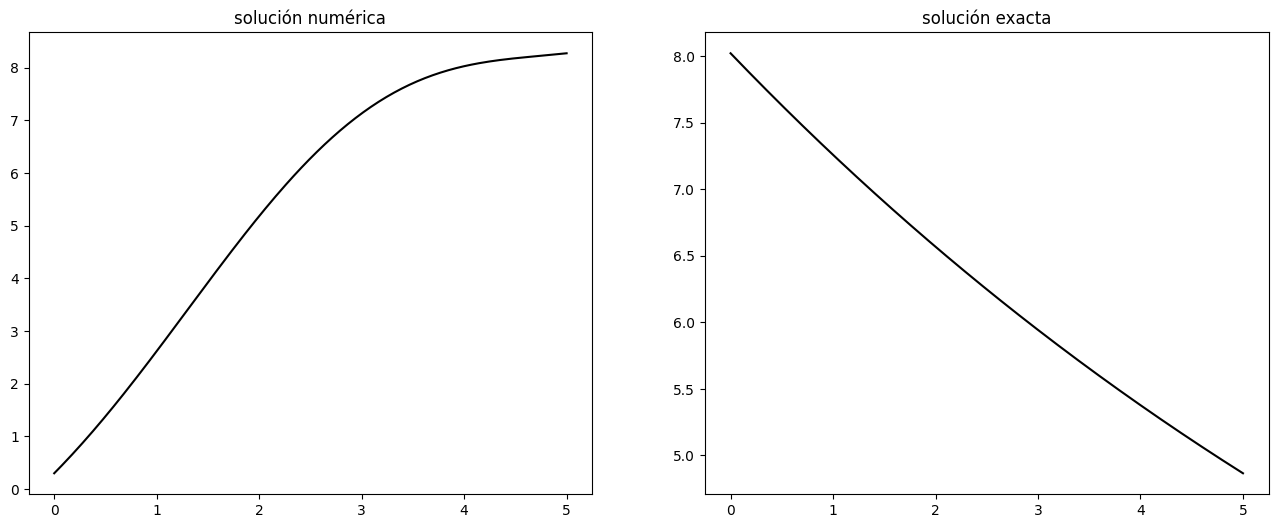

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definición de variable temporal t
t = np.linspace(0, 5, 200)

# Condición inicial para la variable S
S0 = 0.3

# Definición de la función cin(t)
def cin_function(t):
    return 0.2 + 0.1 * np.sin(t)

# Definición de la función de la ecuación diferencial
def fn(S, t):
    cin = cin_function(t)
    return 10 * cin - S/10

# Solución numérica de la ecuación diferencial usando odeint
S_num = odeint(fn, S0, t)

# Solución analítica de la ecuación diferencial
S_exact = S0 * np.exp(-t/10) + 10 * np.exp(-t/10) * np.trapz(cin_function(t[:len(t)//2]) * np.exp(t[:len(t)//2]/10), t[:len(t)//2])

# Creación de subgráficos para comparar soluciones numéricas y exactas
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
axs[0].plot(t, S_num, label="solución numérica", c="black")
axs[1].plot(t, S_exact, label="solución exacta", c="black")
axs[0].set_title("solución numérica")
axs[1].set_title("solución exacta")

# Mostrar gráficos
plt.show()


## Ejercicio

Encuentre la ecuación diferencial para la concentración de un contaminante en un lago.

Suponga que $C(t)$ es la concentración del contaminante en el lago al tiempo $t$ y sea $F$ la razón a la que el agua fluye en el lago en $m^3/día$.

Para modelar la concentración de un contaminante en un lago, podemos utilizar la ecuación diferencial de mezcla. La ecuación de mezcla describe cómo la concentración de una sustancia en un sistema cambia con el tiempo debido a la entrada y salida de esta sustancia.

En este caso, diremos que la única entrada del contaminante en el lago es a través del flujo de agua y que la única salida es a través del flujo de agua. Además, diremos que la concentración del contaminante es uniforme en todo el lago.

Entonces la ecuación diferencial de mezcla podriamos expresarlo como:

$\frac{dC}{dt}=\frac{1}{V}(F_{in}\cdot C_{in} - F_{out} \cdot C)$

Donde:
$\frac{dC}{dt}$ Es la tasa de cambio de la concentración con respecto al tiempo.

$C$ Es la concentración del contaminante en el lago.

$V$ Es el volumen del lago.

$F_{in}$ Es la tasa de flujo de entrada de agua en el lago en $\frac{m^3}{día}$.

$C_{in}$ Es la concentración del contaminante en el agua de entrada.

$F_{out} $ Es la tada de flujo de salida de agua del lago en $\frac{m^3}{día}$.

En este caso, si asumimos que la concentración del contaminante en el agua de entrada es constante (por ejemplo, $C_{in}=C_{0}$, la ecuación es simplificada a:

$\frac{dC}{dt}=\frac{1}{V}(F_{in}\cdot C_{0} - F_{out} \cdot C)$


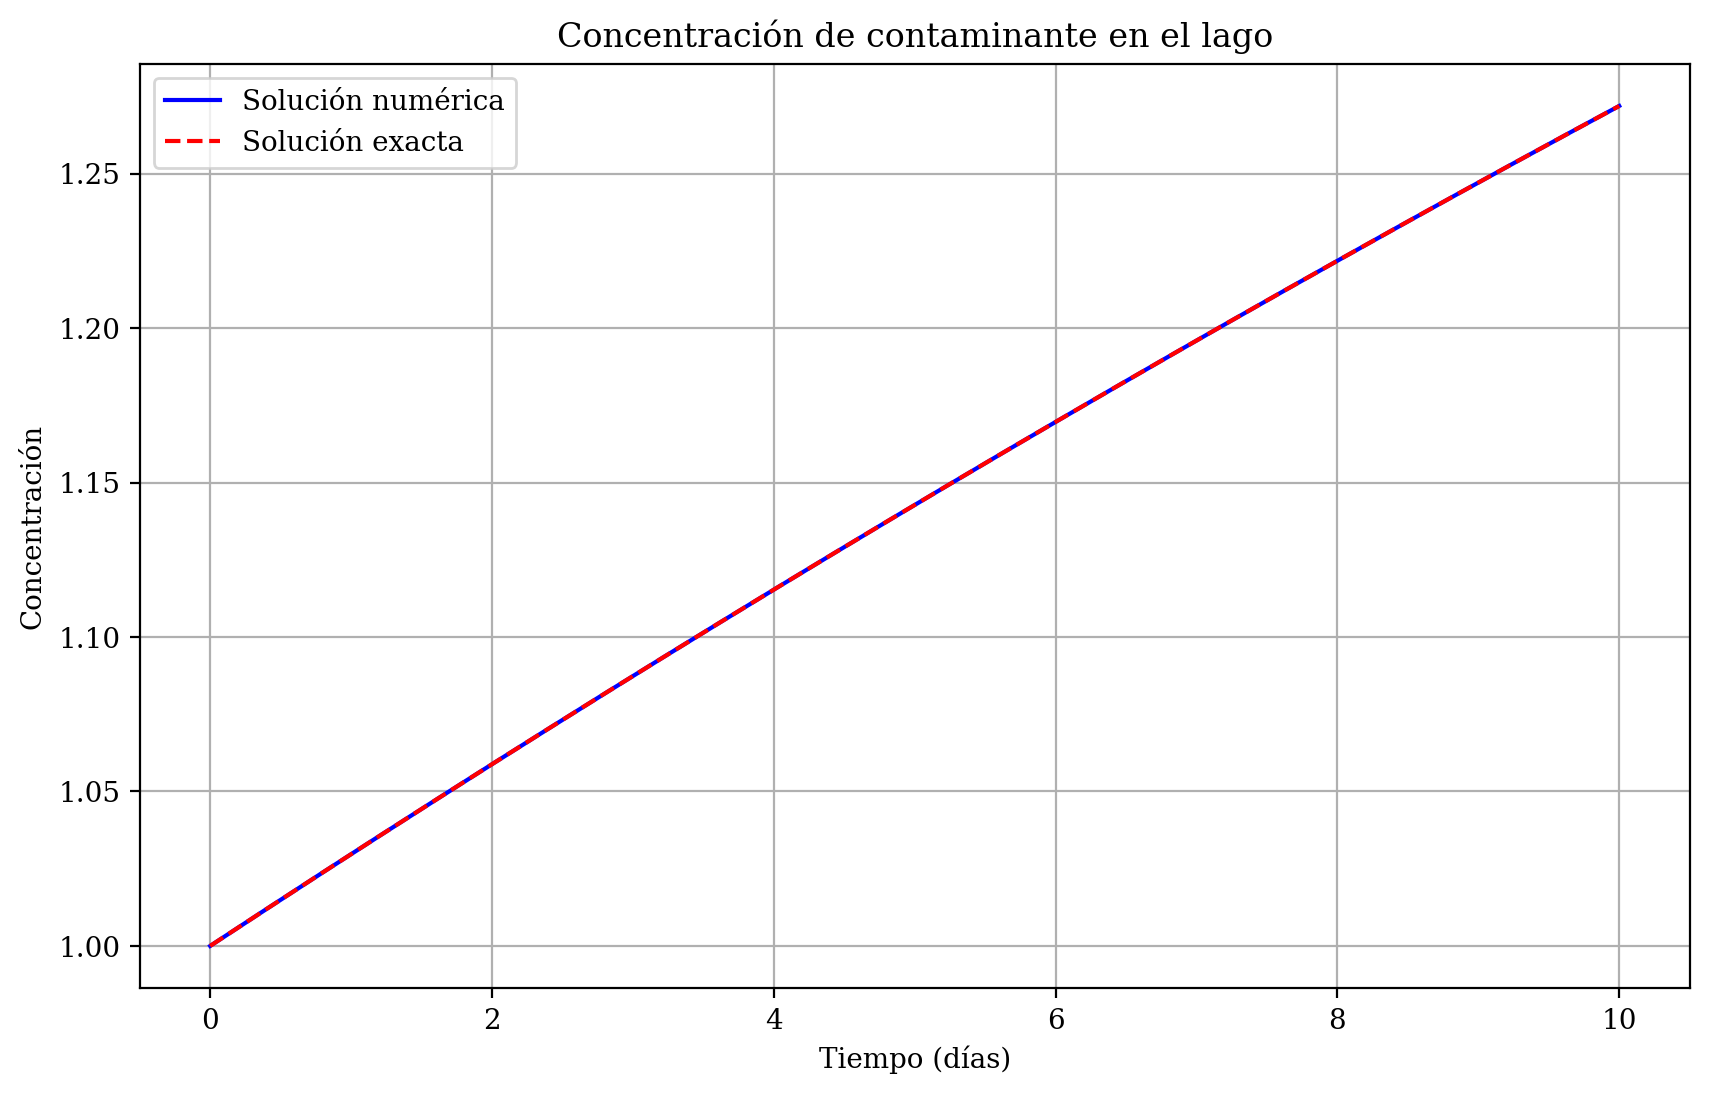

In [ ]:
#la función odeint de SciPy para resolver la ecuación diferencial y luego graficando la solución numérica y exacta.
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definición de variable temporal t
t = np.linspace(0, 10, 200)

# Parámetros del problema
V = 1000  # Volumen del lago en m^3
C0 = 1.0  # Concentración del contaminante en el agua de entrada
F_in = 50  # Tasa de flujo de entrada en m^3/día
F_out = 20  # Tasa de flujo de salida en m^3/día

# Definición de la función de la ecuación diferencial
def dC_dt(C, t):
    return (1/V) * (F_in * C0 - F_out * C)

# Solución numérica de la ecuación diferencial usando odeint
C_num = odeint(dC_dt, C0, t)

# Solución analítica de la ecuación diferencial
C_exact = C0 + (F_in / F_out - 1) * (C0 - C0 * np.exp(-F_out / V * t))

# Gráficos
plt.figure(figsize=(10, 6))
plt.plot(t, C_num, label="Solución numérica", c="blue")
plt.plot(t, C_exact, label="Solución exacta", c="red", linestyle="--")
plt.title("Concentración de contaminante en el lago")
plt.xlabel("Tiempo (días)")
plt.ylabel("Concentración")
plt.legend()
plt.grid(True)
plt.show()


# Solución mediante cálculo simbólico

In [ ]:
import numpy as np

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.rcParams['text.usetex'] = True
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.sans-serif'] = 'stix'

In [ ]:
import sympy
sympy.init_printing()

In [ ]:
from scipy import integrate

### Ejemplo: Ley de enfriamiento de Newton

La Ley de enfriamiento de Newton es:

$$\frac{dT(t)}{dt} = k \Big( T(t) - T_a \Big) $$

donde $T(t)$ es la temperatura de un cuerpo y $T_a$ es la temperatura del ambiente a su alrededor.
Para resolver esta ecuación con scipy procedemos como sigue:

In [ ]:
# Primero definimos los simbolos y representamos la función desconocida.
t, k, T0, Ta = sympy.symbols("t, k, T_0, T_a")
T = sympy.Function("T")

In [ ]:
# Definimos la ecuación a resolver:
ode = T(t).diff(t) + k*(T(t) - Ta)

In [ ]:
ode

In [ ]:
# Resolvemos para hallar la solución general:
ode_sol = sympy.dsolve(ode)

In [ ]:
ode_sol

In [ ]:
# Se pueden referir los dos lados de la solución:
ode_sol.lhs

In [ ]:
ode_sol.rhs

In [ ]:
# Se proporcionan los valores iniciale smediante un diccionario clave-valor
ics = {T(0): T0}

In [ ]:
ics

In [ ]:
# Y resolver con condiciones iniciales:
C_eq = ode_sol.subs(t, 0).subs(ics)

In [ ]:
C_eq

In [ ]:
# Se resuelve la ecuación anterior para determinar la constante de integración
C_sol = sympy.solve(C_eq)

In [ ]:
C_sol

In [ ]:
ode_sol.subs(C_sol[0])

Se puede resolver para diferentes valores de los parámetros de manera concisa y graficar las soluciones.

In [ ]:
def apply_ics(sol, ics, x, known_params):

    free_params = sol.free_symbols - set(known_params)
    eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics)
           for n in range(len(ics))]
    sol_params = sympy.solve(eqs, free_params)
    return sol.subs(sol_params)

In [ ]:
ode_sol

In [ ]:
apply_ics(ode_sol, ics, t, [k, Ta])

In [ ]:
ode_sol = apply_ics(ode_sol, ics, t, [k, Ta]).simplify()

In [ ]:
ode_sol

In [ ]:
y_x = sympy.lambdify((t, k), ode_sol.rhs.subs({T0: 5, Ta: 1}), 'numpy')

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))

x = np.linspace(0, 4, 100)

for k in [1, 2, 3]:
    ax.plot(x, y_x(x, k), label=r"$k=%d$" % k)

ax.set_title(r"$%s$" % sympy.latex(ode_sol), fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend()

fig.tight_layout()

### Ejercicio: Resolver simbólicamente la ecuación de la concentración de sal en el tanque y el modelo del lago, y graficas.